# Выбор модели монетизации игрового приложения

В мобильной игре "Космические братья" пользователи строят свою космическую программу. Заказчик - менеджер, который принимает решения по монетизации игры. Наша главная задача - сформулировать модель монетизации игрового приложения. Механика монетизации - показ рекламы пользователям. Время первого показа сильно влияет на позитивный игровой опыт и последующее удержание пользователей. Нам важно выбрать правильное время для показа рекламы, поэтому целевым событием будет клик по рекламному объявлению. В нашем распоряжении три набора данных - действия в игре, рекламные расходы на привлечение пользователей, источники пользователей. Разделим наше исследование на несколько шагов:<br>
<br>
## <a href='#section1'>1. Загрузка данных и библиотек<br></a><br>
## <a href='#section2'>2. Предобработка данных<br></a>
### <a href='#section21'>2.1. Удаление пропусков, дубликатов, ошибок. Изменение типов данных.<br></a>
### <a href='#section22'>2.2. Добавление столбцов времени<br></a>
### <a href='#section23'>2.3. Расчет времени прохождения уровня для каждого пользователя<br></a>
### <a href='#section24'>2.4. Расчет количества построенных объектов для каждого пользователя<br></a>
## <a href='#section3'>3. Исследовательский анализ данных<br></a>
### <a href='#section31'>3.1. Действия пользователей<br></a>
#### <a href='#section311'>3.1.1. Построенные объекты по типу<br></a>
#### <a href='#section312'>3.1.2. Построенные объекты по количеству уникальных пользователей<br></a>
#### <a href='#section313'>3.1.3. Когортный анализ<br></a>
### <a href='#section32'>3.2. Рекламные активности<br></a>
#### <a href='#section321'>3.2.1.Новые пользователи по дням<br></a>
#### <a href='#section322'>3.2.2. Расходы по дням в разрезе источников перехода<br></a>
#### <a href='#section323'>3.2.3. Источники перехода пользователей по общей стоимости<br></a>
### <a href='#section33'>3.3. Особенности поведения пользователей из разных групп<br></a>
#### <a href='#section331'>3.3.1. Разделение пользователей на группы<br></a>
#### <a href='#section332'>3.3.2. Построенные объекты по типу в разрезе групп<br></a>
#### <a href='#section333'>3.3.3. Построенные объекты по количеству уникальных пользователей в разрезе групп<br></a>
#### <a href='#section334'>3.3.4. Количество уникальных пользователей по источникам в разрезе групп<br></a>
#### <a href='#section335'>3.3.5. Анализ поведения дневных когорт в разрезе групп<br></a>
#### <a href='#section336'>3.3.6. Условия завершения уровня по источникам в разрезе групп<br></a>
#### <a href='#section337'>3.3.7. Количество построенных объектов по условиям завершения уровня в разрезе групп и источников<br></a><br>
### <a href='#section34'>3.4. Расчет прибыльности модели<br></a>
## <a href='#section4'>4. Проверка гипотез<br></a>
### <a href='#section41'>4.1. Нулевая гипотеза 1: В количестве построенных объектов между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, нет статистически значимых различий. Альтернативная гипотеза 1: В количестве построенных объектов между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия.alpha = 0.01<br></a>
### <a href='#section42'>4.2. Нулевая гипотеза 2: Во времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, нет статистически значимых различий. Альтернативная гипотеза 2: Во времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия.alpha = 0.01<br></a><br>
## <a href='#section5'>5. Выводы и рекомендации<br></a><br>

## <a id='section1'>1. Загрузка данных и библиотек<br></a><br>

In [49]:
#Импортируем библиотеки
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
#Выберем стили графиков
large = 16; med = 12; small = 10
params = {'axes.titlesize': med,
          'axes.titleweight': 'light',
          'axes.labelweight': 'light',
          'legend.fontsize': small,
          'figure.figsize': (10, 5),
          'axes.labelsize': med,
          'axes.titlesize': large,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None 
pd.options.display.float_format = "{:.2f}".format
#Импортируем файлы
ad_costs = pd.read_csv('https://raw.githubusercontent.com/stepanaromanov/research_11_game_monetization_model/main/ad_costs.csv')
user_source = pd.read_csv('https://raw.githubusercontent.com/stepanaromanov/research_11_game_monetization_model/main/user_source.csv')
game_actions = pd.read_csv('https://raw.githubusercontent.com/stepanaromanov/research_11_game_monetization_model/main/game_actions.csv')

## <a id='section2'>2. Предобработка данных<br></a>

### <a id='section21'>2.1. Удаление пропусков, дубликатов, ошибок. Изменение типов данных.<br></a>

In [2]:
#Cоздадим функцию получения имени датафрейма
def get_df_name(x):
    name =[y for y in globals() if globals()[y] is x][0]
    return name
#Получаем общую информацию о файлах
for i in ad_costs, game_actions,user_source:
    print('=============================================================')
    print('Получаем информацию о датафрейме: ', get_df_name(i))
    print('=============================================================')
    print()
    display(i.head())
    print('Размер датасета')
    display(i.shape)
    print('Основные статистические характеристики')
    display(i.describe())
    print('Краткий обзор набора данных')
    display(i.info())
    print('Проверка на дубликаты')
    display(i[i.duplicated()].count())

Получаем информацию о датафрейме:  ad_costs



,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


Размер датасета


(28, 3)

Основные статистические характеристики


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


Краткий обзор набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

Проверка на дубликаты


source    0
day       0
cost      0
dtype: int64

Получаем информацию о датафрейме:  game_actions



,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


Размер датасета


(135640, 5)

Основные статистические характеристики


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-10 03:08:18,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


Краткий обзор набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


None

Проверка на дубликаты


event_datetime    1
event             1
building_type     1
user_id           1
project_type      0
dtype: int64

Получаем информацию о датафрейме:  user_source



,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


Размер датасета


(13576, 2)

Основные статистические характеристики


,user_id,source
count,13576,13576
unique,13576,4
top,c1c2b440-1a3b-41b3-b3ec-c49808667295,yandex_direct
freq,1,4817


Краткий обзор набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


None

Проверка на дубликаты


user_id    0
source     0
dtype: int64

В файлах ad_costs и user_source нет явных пропусков, ошибок и дубликатов. В файле game_actions встречаются пропущенные значения в столбцах building_type и project_type и это обусловлено тем, что события в игре не всегда включают постройку здания или постройка здания не всегда приводит к завершению проекта, поэтому мы не будем их изменять. Одно наблюдение в game_actions дублируется, возможно произошел какой-то сбой, его мы исключим. Изменим тип данных у столбца времени, где это возможно.

In [3]:
#Удаляем дубликат
game_actions.drop_duplicates(inplace=True)
#Изменяем тип данных
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

Дубликат удален, типы данных изменены.

### <a id='section22'>2.2. Добавление столбцов времени<br></a>

In [4]:
#Добавляем день события
game_actions['day'] = game_actions['event_datetime'].dt.date
#Определяем время первого и последнего действия для каждого уникального пользователя
first_actions = game_actions\
                    .groupby('user_id')\
                    .agg({'event_datetime':'min'})[['event_datetime']]\
                    .reset_index()
last_actions = game_actions\
                    .groupby('user_id')\
                    .agg({'event_datetime':'max'})[['event_datetime']]\
                    .reset_index()
first_actions.rename(columns={'event_datetime': 'first_action_datetime'}, inplace=True)
last_actions.rename(columns={'event_datetime': 'last_action_datetime'}, inplace=True)
display(first_actions.head(), last_actions.head())

,user_id,first_action_datetime
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58


,user_id,last_action_datetime
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45


In [5]:
#Объединяем полученные таблицы с основной
data = game_actions.merge(first_actions, on='user_id')
data = data.merge(last_actions, on='user_id')
#Будем учитывать день первой активности пользователя и условно посчитаем это днем перехода с источника
data['first_action_day'] =  data['first_action_datetime'].dt.date
#Переводим новые столбцы времени в необходимый формат
data['day'] = pd.to_datetime(data['day'])
data['first_action_day'] = pd.to_datetime(data['first_action_day'])

Добавлены необходимые столбцы времени, типы данных в новых столбцах изменены.

### <a id='section23'>2.3. Расчет времени прохождения уровня для каждого пользователя<br></a><br>

In [6]:
#Рассчитаем время прохождения через разницу времени первого и последнего события
data['time_diff'] = data['last_action_datetime'] - data['first_action_datetime']
#Переведем время в секунды для корректности статистических расчетов
data['time_diff'] = data['time_diff'] / np.timedelta64(1, 's')
data.head()

,event_datetime,event,building_type,user_id,project_type,day,first_action_datetime,last_action_datetime,first_action_day,time_diff
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01,2020-05-04,592020.0
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-04 00:00:01,2020-05-10 20:27:01,2020-05-04,592020.0
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-04 00:00:01,2020-05-10 20:27:01,2020-05-04,592020.0
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-04 00:00:01,2020-05-10 20:27:01,2020-05-04,592020.0
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,2020-05-04 00:00:01,2020-05-10 20:27:01,2020-05-04,592020.0


Теперь мы имеем время нахождения в игре для каждого пользователя, включая тех кто не прошел уровень.

In [7]:
#Определяем, сколько раз событие finished_stage_1 было совершено уникальными пользователями
display(len(data[data['event'] == 'finished_stage_1']),
len(data[data['event'] == 'finished_stage_1'].groupby('user_id').agg({'user_id': 'nunique'})))

5817

5817

Ошибок нет, событие совершалось 1 раз.

In [8]:
#Проверяем, является ли событие прохождение уровня для пользователей последним
errors_last_action = 0
finished_stage_1_data = data[data['event'] == 'finished_stage_1']
for index, row in finished_stage_1_data.iterrows():
    if row['event_datetime'] != row['last_action_datetime']:
        errors_last_action += 1
print(errors_last_action)

0


Ошибок нет, событие прохождение уровня для каждого пользователя является последним.

### <a id='section24'>2.4. Расчет количества построенных объектов для каждого пользователя<br></a>

In [9]:
#Посчитаем количество построенных объектов для каждого пользователя при помощи группировки
total_buildings = data.groupby('user_id').agg({'building_type': 'count'}).reset_index()
total_buildings.rename(columns={'building_type': 'total_buildings'}, inplace=True)
#Соединим полученную таблицу с основным датасетом и получим финальную таблицу с данными
all_data = pd.merge(data, total_buildings, on='user_id')

Мы рассчитали общее количество построенных зданий и получили финальную таблицу. Можно приступать к исследовательскому анализу данных.

## <a id='section3'>3. Исследовательский анализ данных<br></a>

### <a id='section31'>3.1. Действия пользователей<br></a>

#### <a id='section311'>3.1.1. Построенные объекты по типу<br></a>

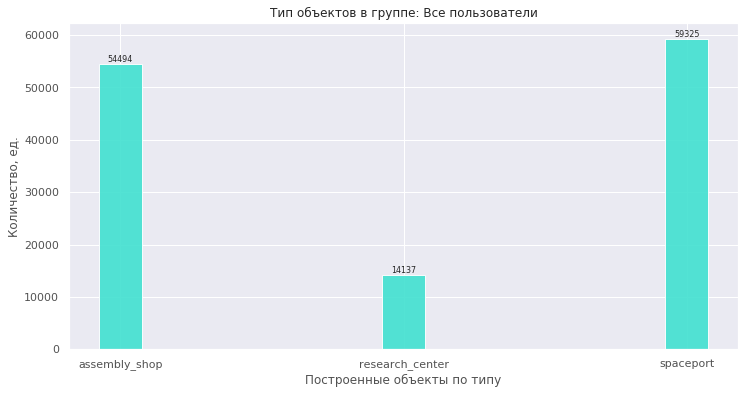

In [73]:
#Создаем функцию добавления численных значений на график
def autolabel(bars, ax):
    ax = ax
    for bar in bars:
      height = round(bar.get_height(), 2)
      label_x_pos = bar.get_x() + bar.get_width() / 2
      ax.text(label_x_pos, height, s=f'{height}', ha='center',
      va='bottom', fontsize=8)
#Посмотрим на график построенных объектов для всех данных
buildings_by_type = all_data\
                    .groupby('building_type')\
                    .agg('count')[['total_buildings']]\
                    .reset_index()
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=buildings_by_type, 
                x='building_type', 
                height = 'total_buildings', 
                color='turquoise', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Количество, ед.', alpha=.8)
plt.title('Тип объектов в группе: Все пользователи')
autolabel(rects, ax)
plt.show()

Больше всего пользователи строят космопорты и сборочные цеха, в меньшей степени - исследовательские центры. Вероятно, исследовательские центры строить сложнее.

#### <a id='section312'>3.1.2. Построенные объекты по количеству уникальных пользователей<br></a>

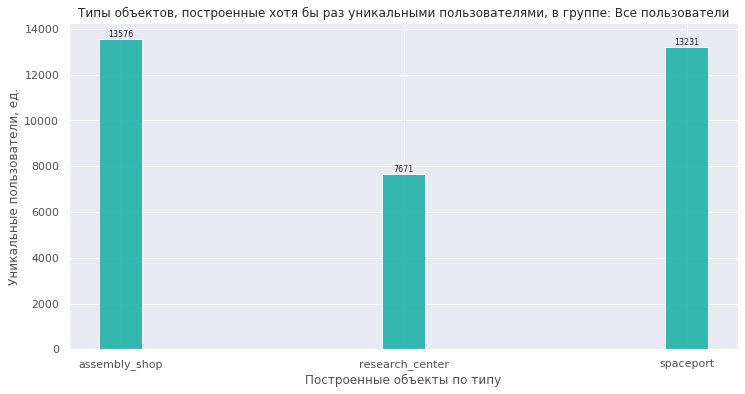

In [74]:
#Посмотрим на график типов объектов, построенных хотя бы раз уникальными пользователями
buildings_by_unique_users = all_data\
                                .groupby('building_type')\
                                .agg({'user_id': 'nunique'})\
                                .reset_index()
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=buildings_by_unique_users, 
                x='building_type', 
                height = 'user_id', 
                color='lightseagreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Типы объектов, построенные хотя бы раз уникальными пользователями, в группе: Все пользователи')
autolabel(rects, ax)
plt.show()

За время игры пользователи стремятся построить каждый тип объекта. Но в течение игры исследовательский центр строят меньше раз, чем космопорты и сборочные цеха. Возможно, в этом нет необходимости или он дороже.

#### <a id='section313'>3.1.3. Когортный анализ<br></a>

Средний процент удержания пользователей в течение дней первой недели: 
cohort_lifetime
0    1.000000
1    0.470384
2    0.480143
3    0.485249
4    0.488889
5    0.478722
6    0.476505
7    0.396552
dtype: float64


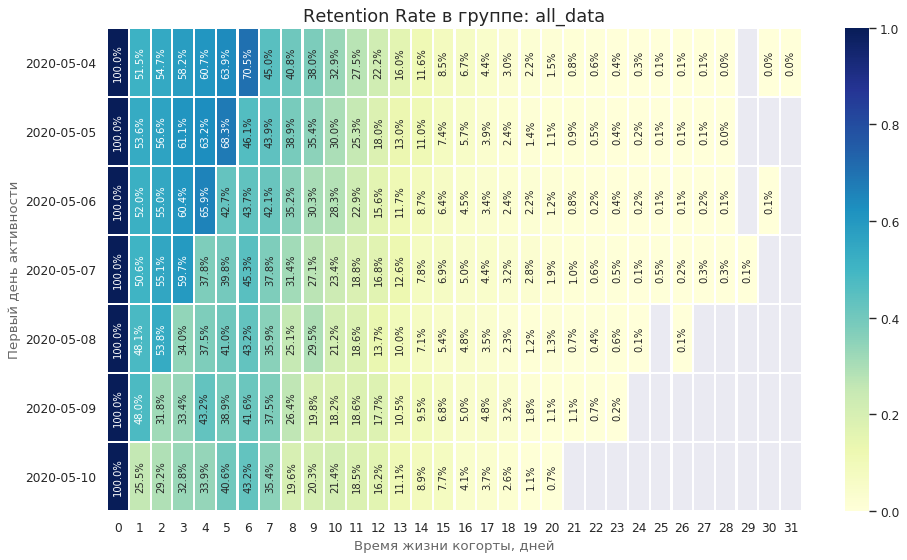

In [12]:
#Создадим функцию для проведения когортного анализа
def cohort_analysis(x):
    #Получаем имя датафрейма
    name = get_df_name(x)
    #Выделяем в качестве событий только построенные здания
    x = x.loc[x['event'] == 'building']
    #Находим к какой когорте относятся пользователь
    x['cohort_lifetime'] = x['day'] - x['first_action_day']
    x['cohort_lifetime'] = (x['cohort_lifetime'] / np.timedelta64(1, 'D'))\
                                                            .round()\
                                                            .astype('int')
    #посчитаем для каждой когорты количество активных пользователей
    cohorts = x\
                .groupby(['first_action_day', 'cohort_lifetime'])\
                .agg({'user_id':'nunique'})\
                .reset_index()
    #Находим исходное количество пользователей в когорте
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_action_day', 'user_id']]
    initial_users_count = initial_users_count.rename(columns = {'user_id': 'cohort_users'})
    # Соедимн исходное количество пользователей с другими данными о когортах
    cohorts = cohorts.merge(initial_users_count, on='first_action_day')
    #Рассчитаем Retention Rate
    cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']
    #Создаем сводную таблицу Retention
    retention_pivot = cohorts.pivot_table(index='first_action_day', 
                                          columns='cohort_lifetime', 
                                          values='retention', 
                                          aggfunc='sum')
    print('Средний процент удержания пользователей в течение дней первой недели: ')
    print(retention_pivot.mean(axis=0)[:8])
    #Выводим тепловую карту
    plt.figure(figsize=(14, 8), dpi= 150)
    sns.set()
    ax = sns.heatmap(retention_pivot, 
                annot=True, 
                cmap="YlGnBu", 
                fmt='.1%', 
                linewidths=1, 
                vmin=0, 
                vmax=1, 
                annot_kws={"fontsize":9, 
                           'rotation':90})
    plt.xlabel('Время жизни когорты, дней', 
               alpha=.7, 
               fontsize=12)
    plt.ylabel('Первый день активности', 
               alpha=.7, 
               fontsize=12)
    title = "Retention Rate в группе: " + name
    plt.title(title, fontsize=16)
    ax.set_yticklabels([str(y)[:10] for y in retention_pivot.index.values])
    plt.show()
#Анализируем Retention rate всех пользователей
cohort_analysis(all_data)

Обычно через неделю игры активными остаются менее 40% пользователей. Причем, пользователи, которые заходили в первые дни были более активны, чем те, что заходили в последние дни. Возможно это связано с новизной самой игры. Основное падение произошло в 1й день. Это может быть связано с тем, что ожидания у части пользователей от игрового опыта не оправдались. Скорее всего, если не препдринять каких-то изменений, удержание и дальше будет падать.

### <a id='section32'>3.2. Рекламные активности<br></a>

#### <a id='section321'>3.2.1. Новые пользователи по дням<br></a>

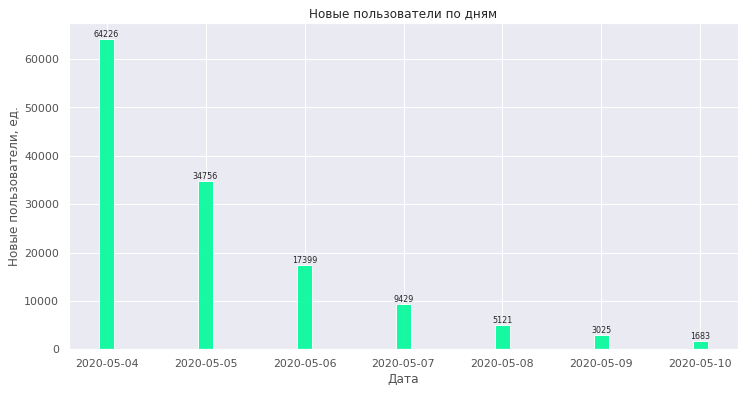

In [76]:
#Построим график первого действия пользователей по дням
first_action_by_days = all_data\
                            .groupby('first_action_day')\
                            .agg('count')[['user_id']].reset_index()
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=first_action_by_days, 
                x='first_action_day', 
                height = 'user_id', 
                color='mediumspringgreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Дата', alpha=.8)
plt.ylabel('Новые пользователи, ед.', alpha=.8)
plt.title('Новые пользователи по дням')
autolabel(rects, ax)
plt.show()

Новых пользователей от рекламы с каждым новым днем приходило меньше.

#### <a id='section322'>3.2.2.Расходы по дням в разрезе источников перехода<br></a>

In [14]:
#Добавляем источник, по которому пришел пользователей к основной таблице
all_data = all_data.merge(user_source, on='user_id')
#Поскольку у нас присутсвует временной лаг в 1 день между расходами на рекламу и действиями пользователей, устраняем его
ad_costs['day'] = ad_costs['day'] + pd.Timedelta(days=1)

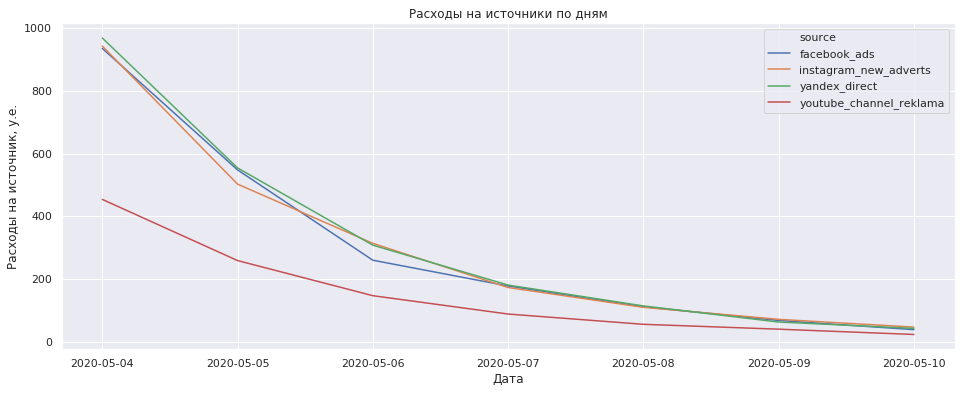

In [15]:
#Построим график расходов по дням в разрезе источников
plt.figure(figsize=(16, 6), dpi= 150)
ax = sns.lineplot(data=ad_costs, 
                  x='day', 
                  y='cost', 
                  hue='source')
ax.set_title('Расходы на источники по дням')
ax.set_xlabel('Дата')
ax.set_ylabel('Расходы на источник, у.е.')
plt.show()

На Facebook, Instagram и Яндекс были потрачены соизмеримые расходы. В два раза меньше тратилось на Youtube. Расходы на рекламу ежедневно сокращались. Соответственно, меньшее количество расходов привело к меньшему количеству пользователей.

#### <a id='section323'>3.2.3. Источники перехода пользователей по общей стоимости<br></a>

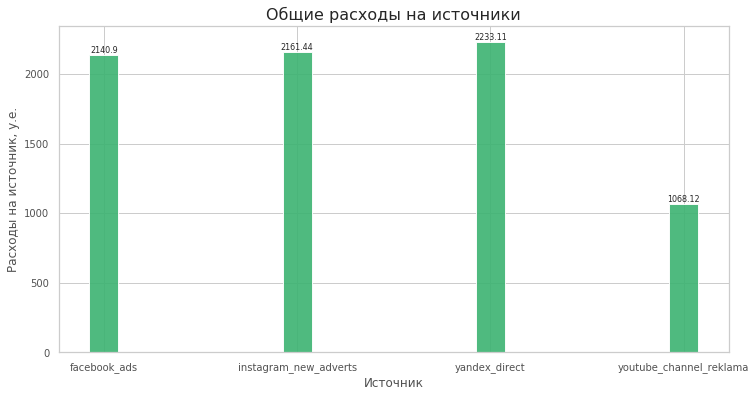

In [54]:
#Суммируем расходы по источникам за всё время
ad_costs_grouped = ad_costs\
                        .groupby('source')\
                        .agg('sum')\
                        .reset_index()
#Построим график
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=ad_costs_grouped, 
                x='source', 
                height = 'cost', 
                color='mediumseagreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Расходы на источник, у.е.', alpha=.8)
plt.title('Общие расходы на источники')
autolabel(rects, ax)
plt.show()

Общие расходы показывают, что на Facebook, Instagram, Яндекс было потрачено более 2000 у.е., в то время как на Youtube - немногим более 1000.

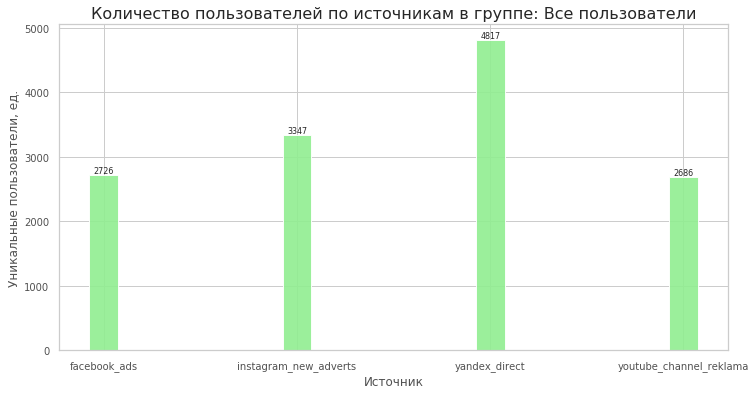

In [56]:
#Создадим функцию отрисовки графика для количества уникальных пользователей по источникам
unique_users_by_source = all_data\
                            .groupby('source')\
                            .agg({'user_id':'nunique'})[['user_id']]\
                            .reset_index()
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=unique_users_by_source, 
                x='source', 
                height = 'user_id', 
                color='lightgreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Количество пользователей по источникам в группе: Все пользователи')
autolabel(rects, ax)
plt.show()

Больше всего уникальных пользователей принес Яндекс, а меньше - Youtube и Facebook.

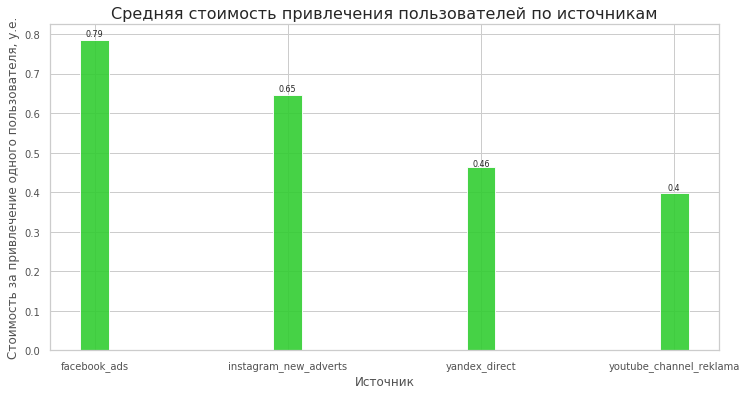

In [57]:
#Объединяем данные о расходах на рекламу и источниках пользователей
ad_costs_and_users = all_data\
                            .groupby('source')\
                            .agg({'user_id':'nunique'})[['user_id']]\
                            .reset_index()\
                            .merge(ad_costs_grouped, 
                                   on='source')
#Находим среднюю стоимость привлечение пользователей через отношение расходов на рекламу к количеству пользователей
ad_costs_and_users['cac'] = ad_costs_and_users['cost'] / ad_costs_and_users['user_id']
#Построим график
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
rects = ax.bar(data=ad_costs_and_users, 
                x='source', 
                height = 'cac', 
                color='limegreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Стоимость за привлечение одного пользователя, у.е.', alpha=.8)
plt.title('Средняя стоимость привлечения пользователей по источникам')
autolabel(rects, ax)
plt.show()

Дешевле всего привлекать пользователей с Youtube (0.4 у.е.) и Yandex(0.46 у.е.), в то время как Facebook(0.79 у.е.) и Instagram(0.65 у.е.) оказались дорогими источниками. 

In [126]:
#Посчитаем, насколько больше трафика мы получим, перераспределив расходы на источники (при условии, что стоимость привлечения при росте трафика и мотиваиция пользователей на всех источниках останется неизменной)
print('Перераспределив бюджет с Facebook и Instagram на Youtube и Yandex, мы получим прирост трафика до', 
      "{0:.2f}%".format(((0.79 + 0.65) / (0.4 + 0.46) - 1) * 100))

Перераспределив бюджет с Facebook и Instagram на Youtube и Yandex, мы получим прирост трафика до 67.44%


### <a id='section33'>3.3. Особенности поведения пользователей из разных источников прихода<br></a>

#### <a id='section331'>3.3.1. Разделение пользователей на группы<br></a>

In [19]:
#Создадим 2 датасета, в которых разделим данные по типу события (завершение уровня и завершение проекта)
data_finished_stage = all_data[all_data['event'] == 'finished_stage_1']
data_project_completed = all_data[all_data['event'] == 'project']
#Найдем уникальных пользователей, которые закончили уровень и которые завершили проект
users_finished_stage = data_finished_stage['user_id'].unique().tolist()
users_project = data_project_completed['user_id'].unique().tolist()
#Проверим, нет ли ошибок и все ли пользователи, которые завершили проект завершили уровень
users_intersection = np.intersect1d(users_finished_stage,users_project)
display(len(users_project), len(users_intersection))

1866

1866

Все верно, ошибок в пересечении нет

In [20]:
#Найдем пользователей, которые завершили уровень через победу над врагом путем исключения тех, кто завершил проект
users_enemy_defeat = list(set(users_finished_stage).symmetric_difference(users_project))
len(users_enemy_defeat)

3951

Всего 3951 пользователь закончили первый уровень, победив первого врага. Это более чем в два раза превосходит тех, кто завершил проект.

In [60]:
#Разделим основной датасет по группам пользователей (победили врага, реализовали проект, другие - не закончили уровень)
warriors = all_data[all_data['user_id'].isin(users_enemy_defeat)]
builders = all_data[all_data['user_id'].isin(users_project)]
not_finished = all_data[~all_data['user_id'].isin(users_enemy_defeat + users_project)]
display(not_finished['user_id'].nunique())

7759

7759 пользователей не закончили уровень. Это превосход по числу тех, кто закончил. Возможно, часть из них сделает это позже - данные ограничены по времени.

In [67]:
#Создадим датасет для создания дашбордов в Tableau
all_data.loc[all_data['user_id'].isin(users_enemy_defeat), 'project_type'] = 'warriors'
all_data.loc[all_data['user_id'].isin(users_project), 'project_type'] = 'builders'
all_data['project_type'].fillna('not_finished', inplace=True)
all_data['project_type'].value_counts()
dashboard_data = all_data[['event', 'building_type', 'user_id', 'source', 'day', 'project_type']]

#### <a id='section332'>3.3.2. Построенные объекты по типу в разрезе групп<br></a>

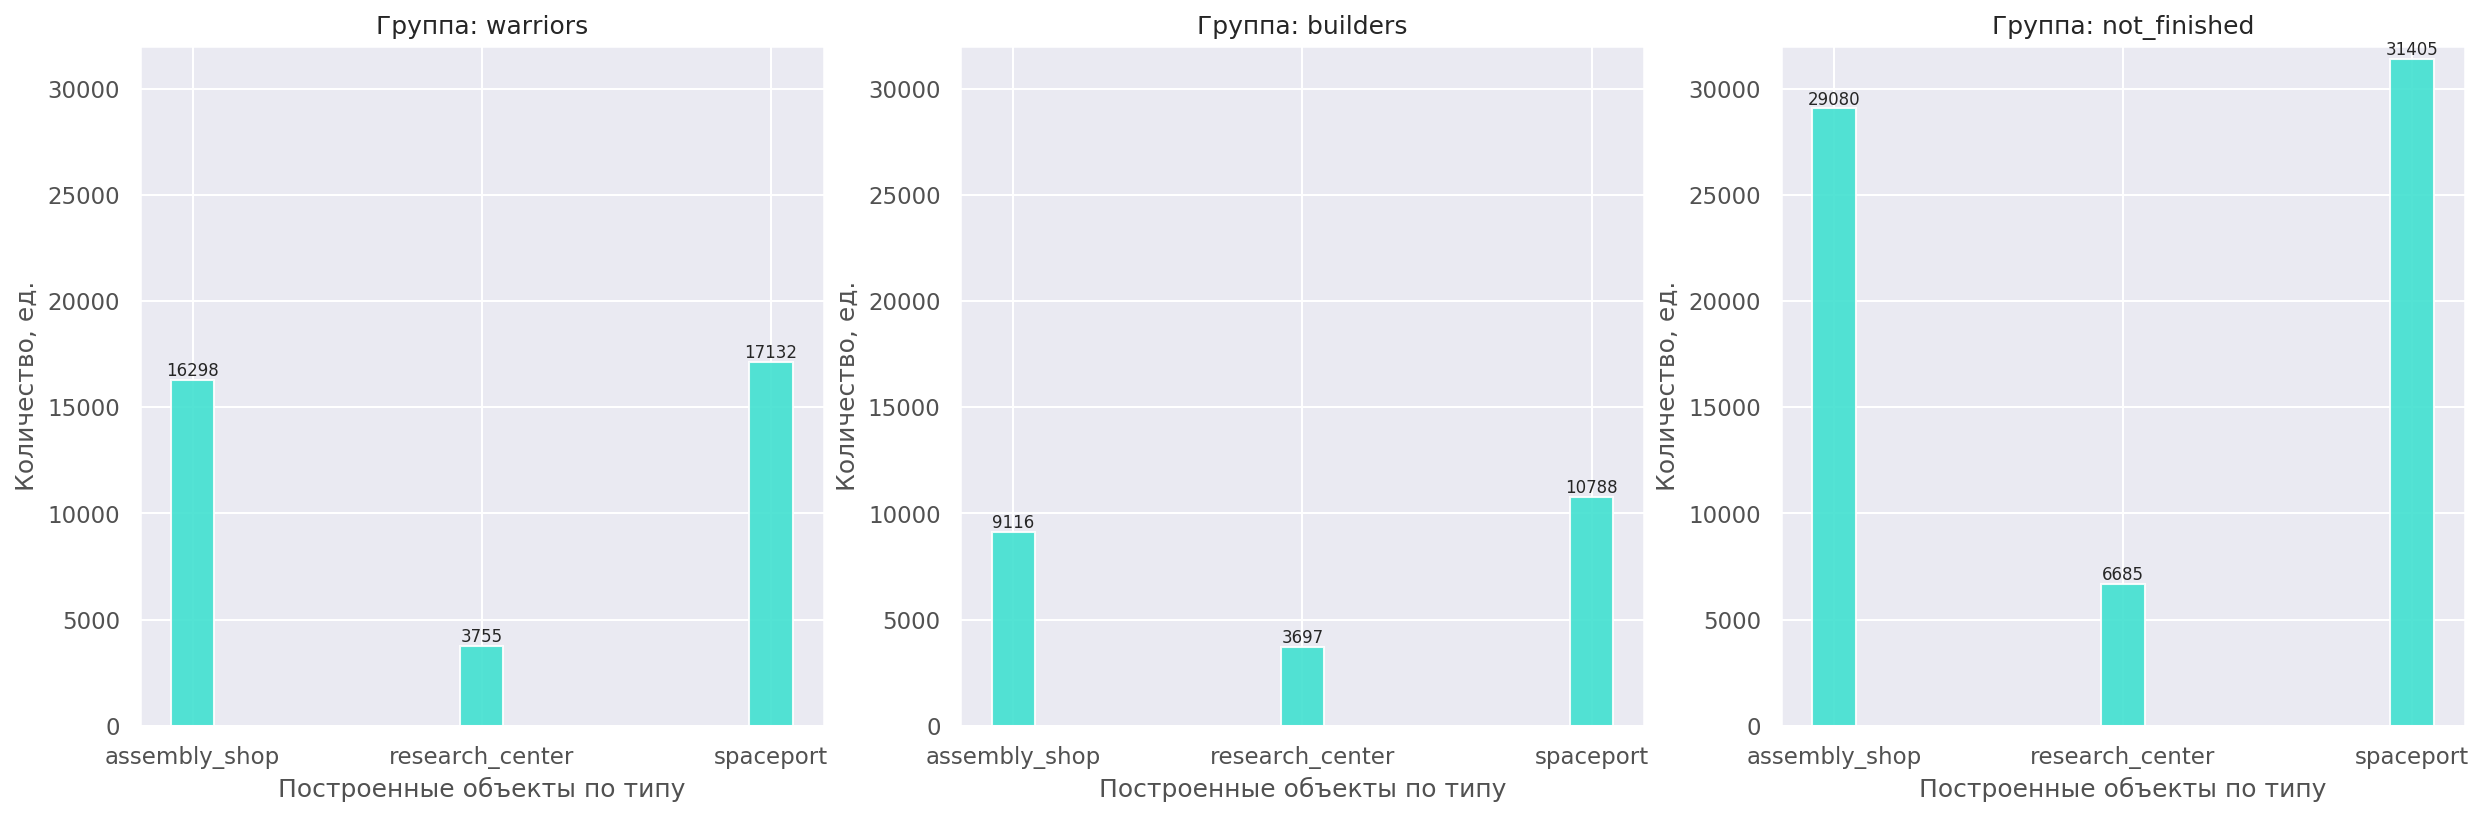

In [89]:
#Создаем графики отрисовки количества построенных объектов по типу объекта для каждой группы пользователей
fig, ax = plt.subplots(figsize=(20,6), dpi= 150)

ax1=plt.subplot(1, 3, 1)

buildings_by_type_1 = warriors\
                    .groupby('building_type')\
                    .agg('count')[['total_buildings']]\
                    .reset_index()

rects1 = ax1.bar(data=buildings_by_type_1, 
                x='building_type', 
                height = 'total_buildings', 
                color='turquoise', 
                width=0.15, 
                alpha=0.9)

plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Количество, ед.', alpha=.8)
plt.title('Группа: warriors')
plt.ylim(0, 32000)
autolabel(rects1, ax1)

ax2=plt.subplot(1, 3, 2)

buildings_by_type_2 = builders\
                    .groupby('building_type')\
                    .agg('count')[['total_buildings']]\
                    .reset_index()

rects2 = ax2.bar(data=buildings_by_type_2, 
                x='building_type', 
                height = 'total_buildings', 
                color='turquoise', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Количество, ед.', alpha=.8)
plt.title('Группа: builders')
plt.ylim(0, 32000)
autolabel(rects2, ax2)

ax3=plt.subplot(1, 3, 3)

buildings_by_type_3 = not_finished\
                    .groupby('building_type')\
                    .agg('count')[['total_buildings']]\
                    .reset_index()

rects3 = ax3.bar(data=buildings_by_type_3, 
                x='building_type', 
                height = 'total_buildings', 
                color='turquoise', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Количество, ед.', alpha=.8)
plt.title('Группа: not_finished')
plt.ylim(0, 32000)
autolabel(rects3, ax3)

plt.show()

В группе пользователей, которые завершили проект, чаще строились исследовательские станции, чем в других группах.

#### <a id='section333'>3.3.3. Построенные объекты по количеству уникальных пользователей в разрезе групп<br></a>

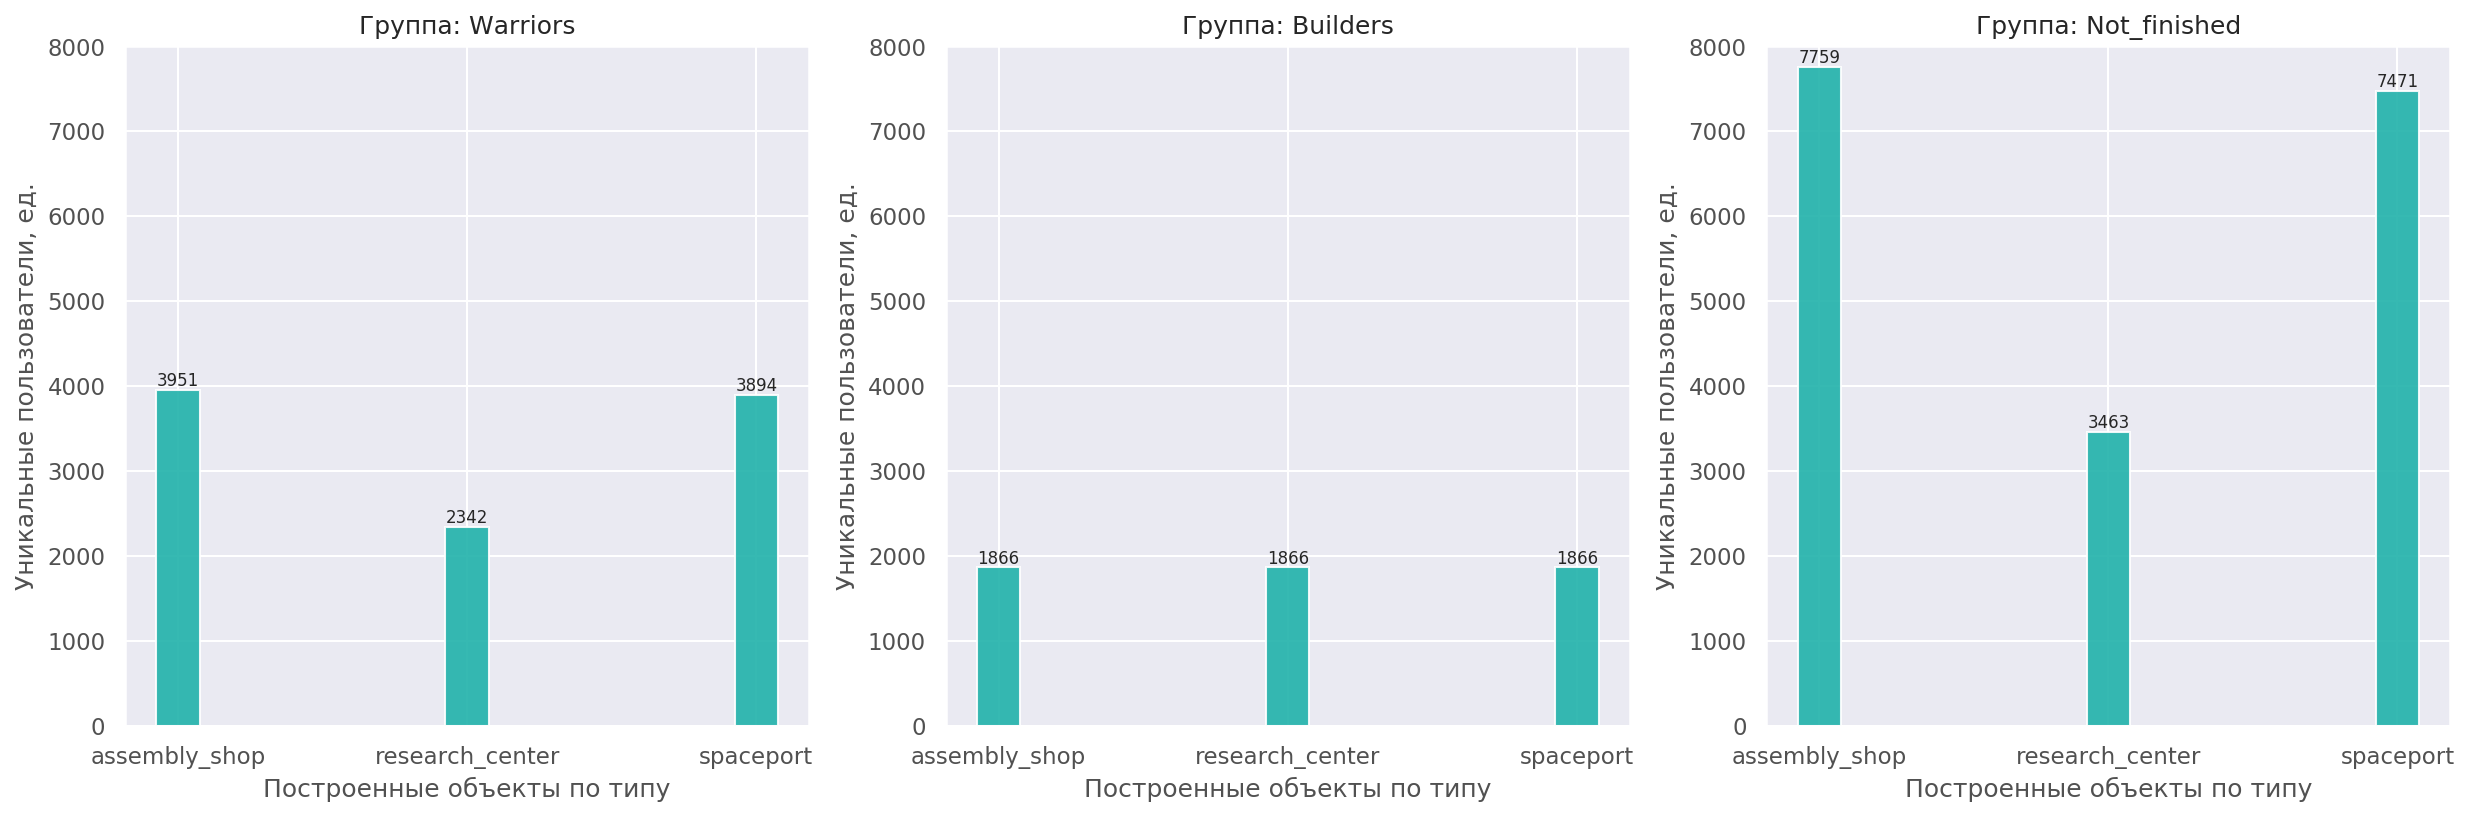

In [92]:
#Посмотрим на графики типов объектов, построенных хотя бы раз уникальными пользователями для каждой группы пользователей
fig, ax = plt.subplots(figsize=(20,6), dpi= 150)

ax1=plt.subplot(1, 3, 1)

buildings_by_unique_users_1 = warriors\
                                .groupby('building_type')\
                                .agg({'user_id': 'nunique'})\
                                .reset_index()
rects1 = ax1.bar(data=buildings_by_unique_users_1, 
                x='building_type', 
                height = 'user_id', 
                color='lightseagreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: Warriors')
plt.ylim(0, 8000)
autolabel(rects1, ax1)

ax2=plt.subplot(1, 3, 2)

buildings_by_unique_users_2 = builders\
                                .groupby('building_type')\
                                .agg({'user_id': 'nunique'})\
                                .reset_index()
rects2 = ax2.bar(data=buildings_by_unique_users_2, 
                x='building_type', 
                height = 'user_id', 
                color='lightseagreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: Builders')
plt.ylim(0, 8000)
autolabel(rects2, ax2)

ax3=plt.subplot(1, 3, 3)

buildings_by_unique_users_3 = not_finished\
                                .groupby('building_type')\
                                .agg({'user_id': 'nunique'})\
                                .reset_index()
rects3 = ax3.bar(data=buildings_by_unique_users_3, 
                x='building_type', 
                height = 'user_id', 
                color='lightseagreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8)
plt.yticks(alpha=.8)
plt.xlabel('Построенные объекты по типу', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: Not_finished')
plt.ylim(0, 8000)
autolabel(rects3, ax3)

plt.show()

Пользователи, которые не прошли уровень, реже строят исследовательские центры в сравнении с теми, кто прошел уровень. В группе строителей построено каждый пользователь построил хотя бы один объект каждого типа. Возможно, это обязательное условие механики игры и орбитальная сборка спутиков невозможна, если отсутствует хотя бы один объект.

#### <a id='section334'>3.3.4. Количество уникальных пользователей по источникам в разрезе групп<br></a>

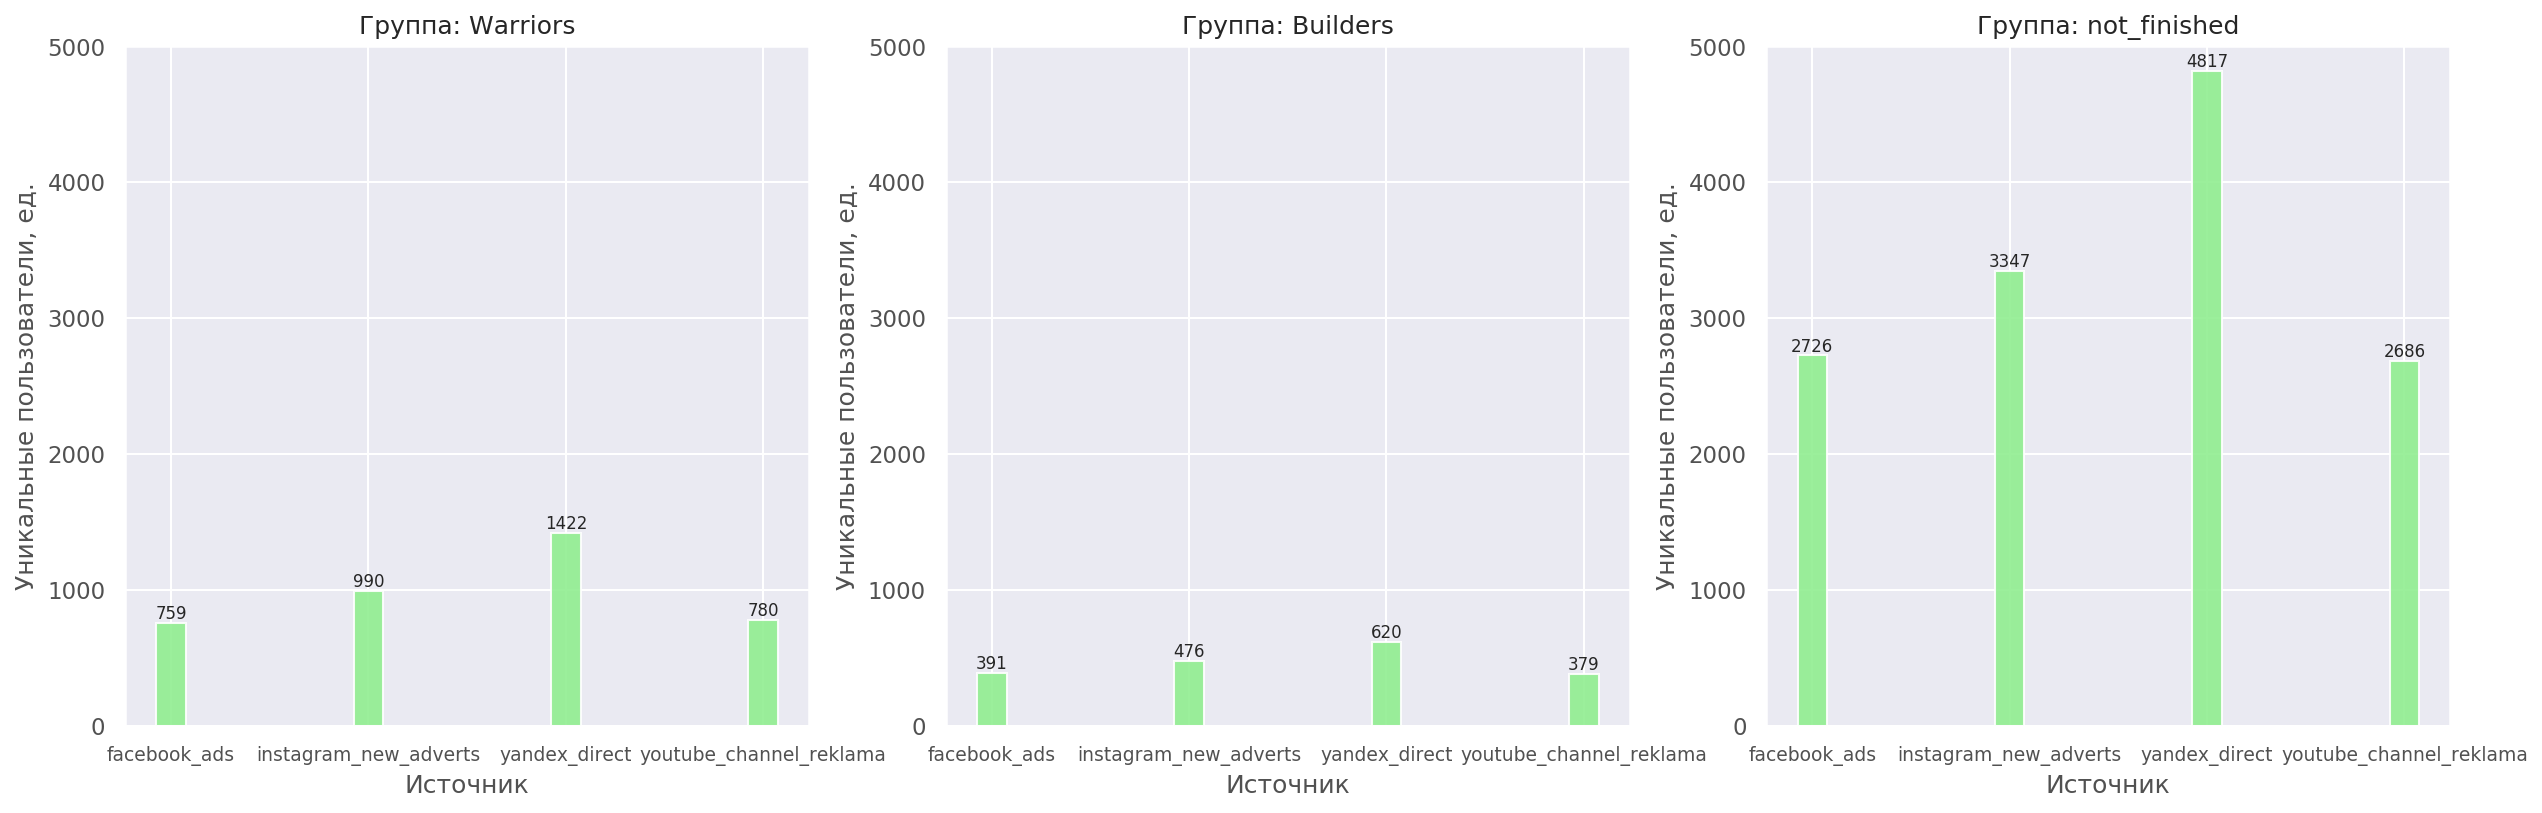

In [106]:
#Создаем графики количества уникальных пользователей по источникам для каждой группы пользователей
fig, ax = plt.subplots(figsize=(20,6), dpi= 150)

ax1=plt.subplot(1, 3, 1)

unique_users_by_source_1 = warriors\
                            .groupby('source')\
                            .agg({'user_id':'nunique'})[['user_id']]\
                            .reset_index()
rects1 = ax1.bar(data=unique_users_by_source_1, 
                x='source', 
                height = 'user_id', 
                color='lightgreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8, fontsize=9)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: Warriors')
plt.ylim(0, 5000)
autolabel(rects1, ax1)

ax2=plt.subplot(1, 3, 2)

unique_users_by_source_2 = builders\
                            .groupby('source')\
                            .agg({'user_id':'nunique'})[['user_id']]\
                            .reset_index()
rects2 = ax2.bar(data=unique_users_by_source_2, 
                x='source', 
                height = 'user_id', 
                color='lightgreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8, fontsize=9)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: Builders')
plt.ylim(0, 5000)
autolabel(rects2, ax2)

ax3=plt.subplot(1, 3, 3)

unique_users_by_source_3 = not_finished\
                            .groupby('source')\
                            .agg({'user_id':'nunique'})[['user_id']]\
                            .reset_index()
rects3 = ax3.bar(data=unique_users_by_source, 
                x='source', 
                height = 'user_id', 
                color='lightgreen', 
                width=0.15, 
                alpha=0.9)
plt.xticks(rotation=0, alpha=.8, fontsize=9)
plt.yticks(alpha=.8)
plt.xlabel('Источник', alpha=.8)
plt.ylabel('Уникальные пользователи, ед.', alpha=.8)
plt.title('Группа: not_finished')
plt.ylim(0, 5000)
autolabel(rects3, ax3)

plt.show()

На первый взгляд, рекламный источник не влияет на то, как пользователь будет вести себя в игре. Пользователи со всех источников имеют схожую мотивацию.

#### <a id='section335'>3.3.6. Анализ поведения дневных когорт в разрезе групп и источников<br></a>

Средний процент удержания пользователей в течение дней первой недели: 
cohort_lifetime
0   1.00
1   0.50
2   0.48
3   0.52
4   0.51
5   0.50
6   0.50
7   0.43
dtype: float64


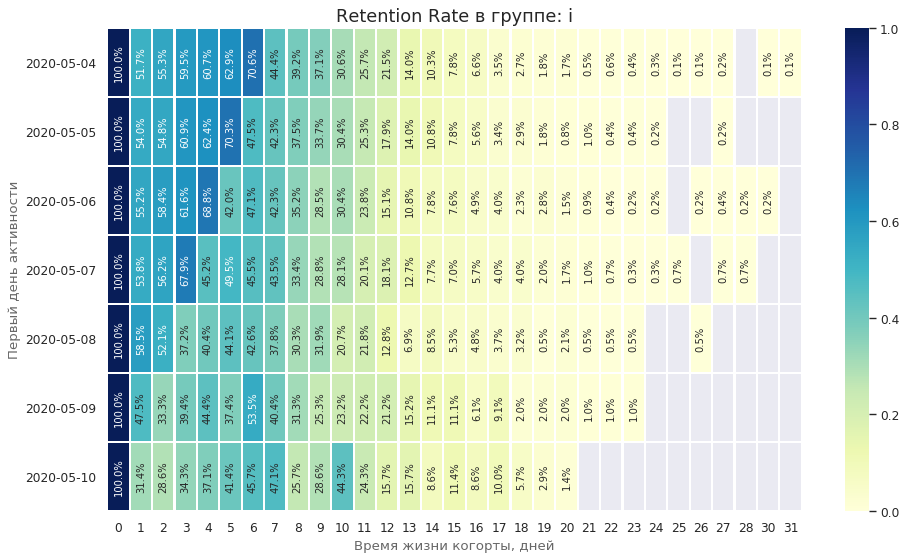

In [64]:
#Анализируем Retention rate пользователей из разных групп
cohort_analysis(warriors)

Средний процент удержания пользователей в течение дней первой недели: 
cohort_lifetime
0   1.00
1   0.59
2   0.60
3   0.58
4   0.65
5   0.64
6   0.63
7   0.61
dtype: float64


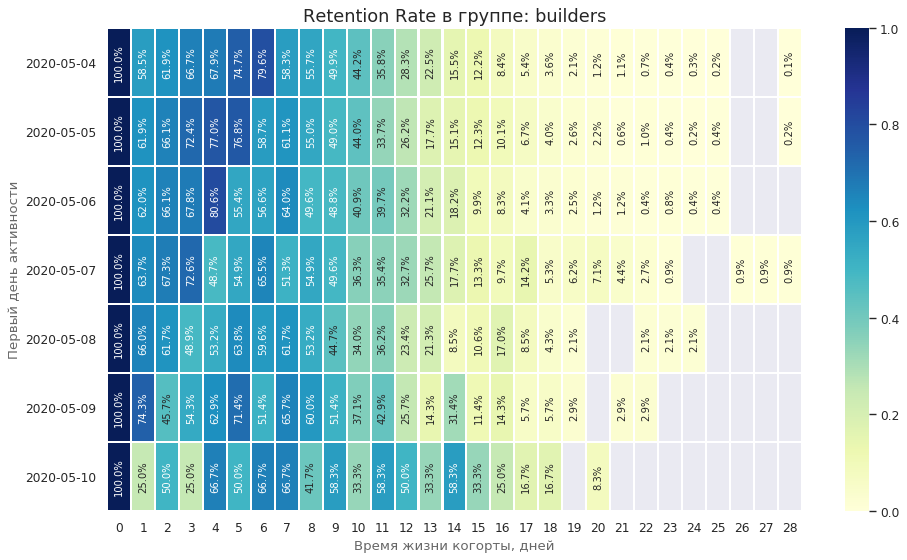

In [65]:
cohort_analysis(builders)

Средний процент удержания пользователей в течение дней первой недели: 
cohort_lifetime
0   1.00
1   0.44
2   0.46
3   0.46
4   0.45
5   0.45
6   0.44
7   0.35
dtype: float64


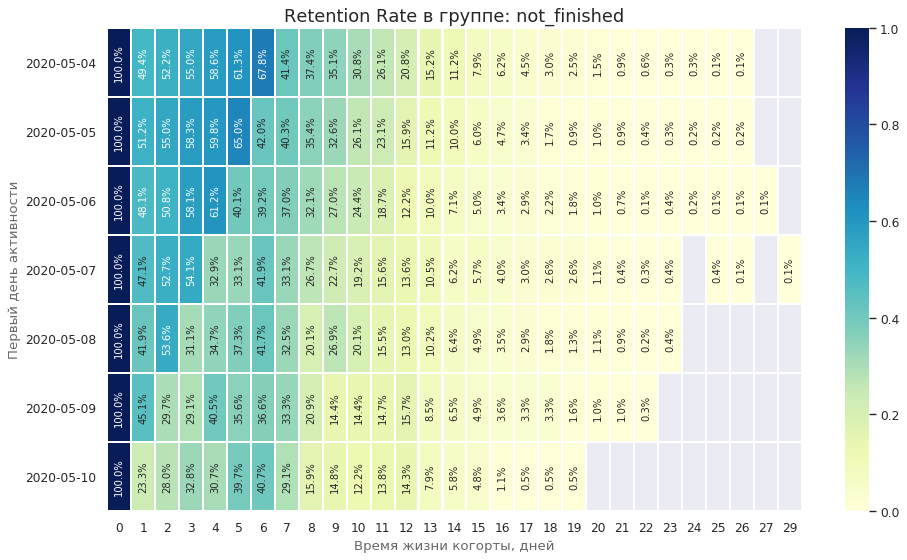

In [66]:
cohort_analysis(not_finished)

Пользователи, которые заканчивают уровень через реализацию проекта, наименее всех подвержены оттоку. Через неделю использования их остается 60%, в то время как пользователи из группы победивших первого врага 40%, а тех, кто не закончил уровень - 35%. В среднем, пользователи в первые дни после начала игры, менее вовлечены. Пиковое значение Retention наступает для тех, кто завершил проект обычно наступает на 4й день, для тех, кто победил врага на 3-4й дни, а для тех, кто не прошел уровень - на 2-4й день. 

### <a id='section34'>3.4. Расчет прибыльности модели<br></a>

In [128]:
#Определим среднюю стоимость привлечения пользователя
round(ad_costs_and_users['cac'].mean(), 2)

0.57

Для того чтобы компенсировать расходы на привлечение пользователя, нам необходимо продать рекламы на 0.57 у.е. Учитывая специфику баннерной рекламы, то такая сумма может взиматься с рекламодателей за 1000 показов (0.57 у.е cpm). 

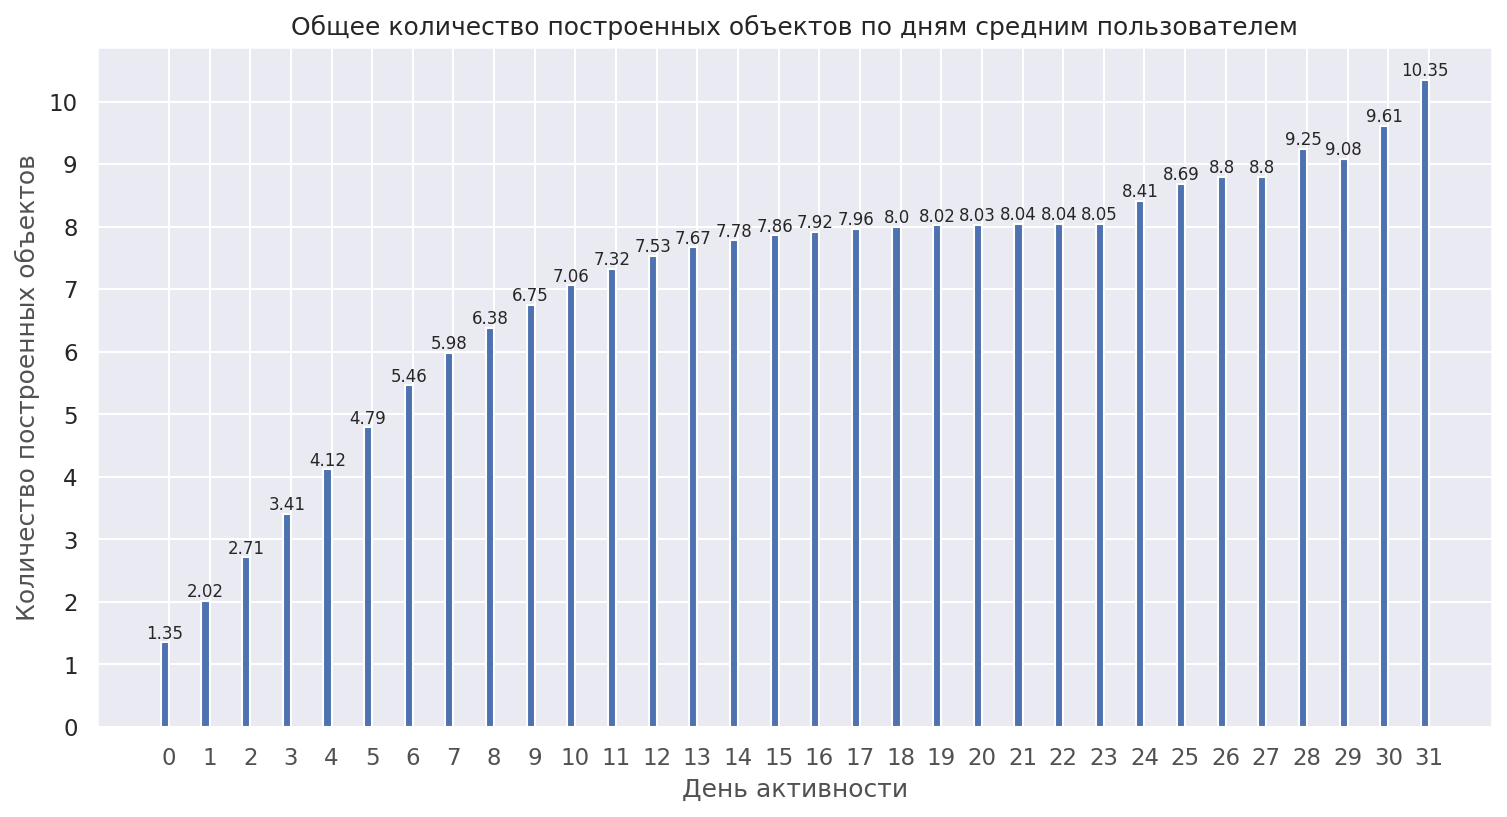

In [194]:
#Группируем данные для анализа построенных объектов 
buildings_data = all_data\
                    .groupby(['first_action_day',
                              'day'])\
                    .agg({'user_id' : 'nunique', 
                          'building_type': 'count'})\
                    .reset_index()
#Посчитаем время жизни дневных когорт
buildings_data['cohort_lifetime'] = ((buildings_data['day'] - buildings_data['first_action_day'])/np.timedelta64(1, 'D')).round().astype('int')
#Посчитаем, сколько пользователей находится в каждой из когорт на старте и добавим эти данные в таблицу
initial_users_count_buildings = buildings_data[buildings_data['cohort_lifetime'] == 0][['first_action_day', 'user_id']]
initial_users_count_buildings = initial_users_count_buildings.rename(columns = {'user_id': 'cohort_users'})
buildings_data = buildings_data.merge(initial_users_count_buildings, on=['first_action_day'])
#Посчитаем, сколько в среднем строили объектов пользователи
buildings_data['buildings_per_user'] = buildings_data['building_type'] / buildings_data['cohort_users']
#Посмотрим, сколько в среднем зданий строили пользователи из разных когорт за все время по дням
buildings_pivot = buildings_data.pivot_table(index='first_action_day',
                                             columns='cohort_lifetime',
                                             values='buildings_per_user',
                                             aggfunc='sum')
buildings_sum = buildings_pivot.cumsum(axis=1).mean()
#Построим график
fig, ax = plt.subplots(figsize=(12,6), dpi= 150)
buildings_series = round(buildings_sum, 2).tolist()
buildings_series_len = np.arange(len(buildings_series))
width = 0.20
rects = ax.bar(buildings_series_len - width/2, buildings_series, width)
plt.xticks(buildings_series_len, alpha=.8)
ax.set_yticks(np.arange(0, 11, 1))
plt.xlabel('День активности', alpha=.8)
plt.ylabel('Количество построенных объектов', alpha=.8)
plt.title('Общее количество построенных объектов по дням средним пользователем')
autolabel(rects, ax)
plt.show()

In [198]:
#Посчитаем, сколько в среднем строит объектов пользователь
all_data\
        .groupby('user_id')\
        .agg({'building_type':'count'})\
        .reset_index()\
        .mean()

building_type   9.43
dtype: float64

В среднем за всё время средний пользователь строит 9.43 объекта. На второй день средний пользователь успевает построить 2.71 объекта, на 3й 3.41, а на 4й 4.12 объекта.

In [203]:
#Посчитаем, сколько должно показываться рекламных объявлений, если мы начинаем показывать рекламу на 2, 3, 4 день
print('Модель со 2 дня. Минимальное количество рекламных объявлений во время постройки здания: ', round(1000 / (9.43-2.71)))
print('Модель с 3 дня. Минимальное количество рекламных объявлений во время постройки здания: ', round(1000 / (9.43-3.41)))
print('Модель с 4 дня. Минимальное количество рекламных объявлений во время постройки здания: ', round(1000 / (9.43-4.12)))

Модель со 2 дня. Минимальное количество рекламных объявлений во время постройки здания:  149
Модель с 3 дня. Минимальное количество рекламных объявлений во время постройки здания:  166
Модель с 4 дня. Минимальное количество рекламных объявлений во время постройки здания:  188


## <a id='section4'>4. Проверка гипотез<br></a>

Для тестов 4.1, 4.2 мы будем находить U-критерий Манна-Уитни. Он используется для оценки различий между двумя независимыми выборками по уровню какого-либо количественного признака. U-критерий Манна-Уитни является непараметрическим критерием, поэтому, в отличие от t-критерия Стьюдента, не требует наличия нормального распределения сравниваемых совокупностей. Поскольку в обеих гипотезах будут сравниваться пользователи из тех же самых групп, это является множественным тестом и нам необходимо скорректировать уровень значимости по методу Бонферонни (a/2)

In [111]:
#Отбираем необходимые данные для проверки гипотез
groupA = builders\
            .groupby('user_id')\
            .agg({'time_diff': 'max',
                  'total_buildings': 'max'})\
            .reset_index()
groupB = warriors\
            .groupby('user_id')\
            .agg({'time_diff': 'max', 
                  'total_buildings': 'max'})\
            .reset_index()
groupC = not_finished\
            .groupby('user_id')\
            .agg({'time_diff': 'max', 
                  'total_buildings': 'max'})\
            .reset_index()
display(groupA.head(), groupB.head())

,user_id,time_diff,total_buildings
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,1017534.00,11
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,1372048.00,12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,1732358.00,11
3,00de2809-403e-4476-a2f7-ca1b11700190,1215920.00,13
4,00e83261-5fd4-4939-9616-802b5a0202c6,1273507.00,13


,user_id,time_diff,total_buildings
0,001d39dc-366c-4021-9604-6a3b9ff01e25,556722.00,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,1084605.00,8
2,004074f8-251a-4776-922c-8348dca1a2f6,1104605.00,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,977192.00,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,525532.00,3


In [112]:
#Выведем средние значения общего количества построенных объектов на пользователя у каждой из групп
display(groupA['total_buildings'].mean(), 
        groupB['total_buildings'].mean(), 
        groupC['total_buildings'].mean())

12.64790996784566

9.411541381928625

8.657043433432143

In [113]:
#Выведем средние значения потраченного на прохождение уровня времени на пользователя у каждой из групп
display(groupA['time_diff'].mean(), 
        groupB['time_diff'].mean(), 
        groupC['time_diff'].mean())

1162849.1350482316

959424.0761832447

845698.2554452893

На первый взгляд, пользователи группы B строят меньше зданий и тратят меньше времени в среднем, чем пользователи группы A. Группа C (пользователи, которые не завершили уровень) строят еще меньше зданий и проводят еще меньше времени чем пользователи групп B. Поскольку для нас важно сравнение групп A и B, изучим, являются ли различия между пользователями этих групп статистически значимыми.

### <a id='section41'>4.1. Нулевая гипотеза 1: В количестве построенных объектов между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, нет статистически значимых различий. Альтернативная гипотеза 1: В количестве построенных объектов между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия. alpha = 0.01<br></a>

In [114]:
#Проверим гипотезу, рассчитав U-критерий Манна-Уитни
alpha = 0.01 / 2
result1 = st.mannwhitneyu(groupA['total_buildings'], 
                          groupB['total_buildings'])[1]
print('p-значение: ', '{0:.3f}'.format(result1))
if result1 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.000
Отвергаем нулевую гипотезу


В количестве построенных объектов между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия. Пользователи, которые реализуют проект строят больше объектов.

### <a id='section42'>4.2. Нулевая гипотеза 2: Во времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, нет статистически значимых различий. Альтернативная гипотеза 2: Во времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия. alpha = 0.01<br></a><br>

In [115]:
#Проверим гипотезу, рассчитав U-критерий Манна-Уитни
alpha = 0.01 / 2
result2 = st.mannwhitneyu(groupA['time_diff'], 
                          groupB['time_diff'])[1]
print('p-значение: ', '{0:.3f}'.format(result2))
if result2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.000
Отвергаем нулевую гипотезу


Во времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия. Пользователи, которые реализуют проект проводят больше времени в игре.

## <a id='section5'>5. Выводы и рекомендации <br></a><br>

### Выводы
#### Действия в игре
1866 пользователей завершили проект через реализацию уровня, 3951 через победу над первым врагом, в то время как 7759 не завершили уровень. В группе пользователей, которые завершили проект, чаще строились исследовательские станции, чем в других группах. Пользователи, которые не прошли уровень, реже строят исследовательские центры в сравнении с теми, кто прошел уровень. В количестве построенных объектов и времени прохождения уровня между пользователями, которые завершили уровень через реализацию проекта, и пользователями, которые завершили уровень через победу над другим игроком, есть статистически значимые различия. Пользователи, которые реализуют проект строят больше объектов и проводят больше времени в игре.

#### Рекламные источники
На Facebook, Instagram и Яндекс были потрачены соизмеримые расходы. В два раза меньше тратилось на Youtube. Расходы на рекламу ежедневно сокращались. Дешевле всего привлекать пользователей с Youtube и Yandex, в то время как Facebook и Instagram оказались дорогими источниками. Пользователи со всех источников имеют схожую мотивацию. 

#### Удержание пользователей
Пользователи, которые заканчивают уровень через реализацию проекта, наименее всех подвержены оттоку. Через неделю использования их остается 60%, в то время как пользователи из группы победивших первого врага 40%, а тех, кто не закончил уровень - 35%. В среднем, пользователи в первые дни после начала игры, менее вовлечены. Пиковое значение Retention наступает для тех, кто завершил проект обычно наступает на 4й день, для тех, кто победил врага на 3-4й дни, а для тех, кто не прошел уровень - на 2-4й день.
### Рекомендации
#### Изменение механики игры
Следует дополнительно исследовать как пользователи строят объекты. Являются ли эти постройки взаимозависимыми, сколько времени на это требуется, какие ресурсы нужны для этого, насколько необходимость постройки объектов и методология игры просты для понимания. Это нужно для облегчения и улучшения пользовательского опыта. Главная цель - получить как можно больше пользователей, которые будут строить объекты и реализовывать проект, следовательно, смотреть рекламу.
#### Выбор модели монетизации
Показ рекламы на экране с выбором объекта для постройки должен происходить не раньше 2го дня, а лучше 4го дня игры. Если дополнительно исследовать, как ведут себя пользователи, можно будет на основании паттернов поведения причислить их к определенной группе на старте игры и настроить индивидуальный показ рекламы. Более тонкая настройка может включать:<br><br>
1) для группы тех, кто завершает уровень через реализацию проекта - реклама включается на 4й день, им показывается больше рекламы чем другим.<br>
2) для группы тех, кто завершает уровень через реализацию проекта - реклама включается на 3й день, им показывается среднее количество рекламы.<br>
2) для группы тех, кто не завершил уровень - реклама включается на 2й день, им показывается небольшое количество рекламы, до момента пока они не пройдут первый уровень.<br><br>
Возможно, стоит показывать рекламу во время каких-то действий с первым врагом. Это актуально для той группы пользователей, которые не реализуют проект.